<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Dayana Navarro Valencia y Juan Pablo Ruiz Magaña.

**Fecha:** 27 de Abril 2021:

**Expediente** : 721470 y 721093
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link del Repositorio**:https://github.com/JuanPablo2019/Tarea9.git

# Tarea 9:  Clase 22

## Enunciado de tarea 
# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.

### `Respuesta de Dayana`

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline


### `Elección del activo:` _Mc´Donalds_

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

### PRECIOS DE CIERRE

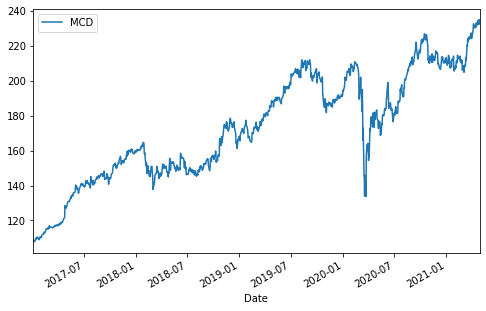

In [3]:
ticker = ['MCD']
start_date = '2017-01-01'

closes_mc = get_adj_closes(ticker, start_date)
closes_mc.plot(figsize=(8,5));
plt.legend(ticker);

### PRECIOS CIERRE LOGARITMICOS

In [4]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

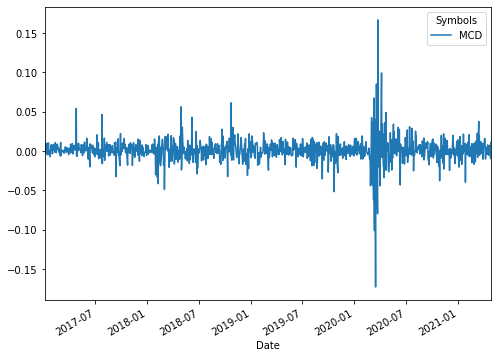

In [5]:
ret_mc = calc_daily_ret(closes_mc)
ret_mc.plot(figsize=(8,6));

## INFORMACIÓN OPCIONES 

In [6]:
mc = web.YahooOptions('MCD')
mc_opt = mc.get_all_data().reset_index()
mc_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,,,,,,,,,,,,
2021-04-30,212.5,call,MCD210430C00212500,21.23,20.50,21.05,-1.540001,-6.763289,20.0,404.0,0.671878,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-28 17:07:20,"{'contractSymbol': 'MCD210430C00212500', 'stri..."
2021-04-30,180.0,put,MCD210430P00180000,0.04,0.00,0.29,0.000000,0.000000,3.0,9.0,1.332035,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-21 17:09:44,"{'contractSymbol': 'MCD210430P00180000', 'stri..."
2021-04-30,252.5,call,MCD210430C00252500,0.12,0.11,0.13,-0.020000,-14.285716,65.0,121.0,0.480474,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-28 18:39:54,"{'contractSymbol': 'MCD210430C00252500', 'stri..."
2021-04-30,227.5,put,MCD210430P00227500,0.86,0.82,0.91,0.210000,32.307700,486.0,877.0,0.338874,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-28 19:02:40,"{'contractSymbol': 'MCD210430P00227500', 'stri..."
2021-04-30,255.0,call,MCD210430C00255000,0.09,0.07,0.09,-0.020000,-18.181814,50.0,75.0,0.497075,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-28 17:45:47,"{'contractSymbol': 'MCD210430C00255000', 'stri..."
2021-04-30,227.5,call,MCD210430C00227500,6.45,6.40,6.75,-2.000000,-23.668640,12.0,618.0,0.408941,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-28 18:33:54,"{'contractSymbol': 'MCD210430C00227500', 'stri..."
2021-04-30,185.0,put,MCD210430P00185000,0.01,0.00,0.31,0.000000,0.000000,10.0,21.0,1.218754,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-27 16:06:39,"{'contractSymbol': 'MCD210430P00185000', 'stri..."
2021-04-30,180.0,call,MCD210430C00180000,52.29,52.85,53.50,0.000000,0.000000,4.0,4.0,1.486331,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-26 19:53:43,"{'contractSymbol': 'MCD210430C00180000', 'stri..."
2021-04-30,225.0,put,MCD210430P00225000,0.49,0.49,0.52,0.080000,19.512197,576.0,3279.0,0.351569,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-28 19:06:14,"{'contractSymbol': 'MCD210430P00225000', 'stri..."


In [7]:
K = 250 # strike price
indice_opt = mc_opt.loc[(mc_opt.Type=='put') & (mc_opt.Strike==K) & (mc_opt.Expiry=='2021-06-18')]
indice_opt

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
495,250.0,2021-06-18,put,MCD210618P00250000,18.05,18.9,19.4,-0.690001,-3.681967,4.0,85.0,0.223824,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-26 14:13:18,"{'contractSymbol': 'MCD210618P00250000', 'stri..."


In [8]:
i_opt= indice_opt.index
opcion_valuar = mc_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'MCD210618P00250000',
 'strike': 250.0,
 'currency': 'USD',
 'lastPrice': 18.05,
 'change': -0.69000053,
 'percentChange': -3.6819665,
 'volume': 4,
 'openInterest': 85,
 'bid': 18.9,
 'ask': 19.4,
 'contractSize': 'REGULAR',
 'expiration': 1623974400,
 'lastTradeDate': 1619446398,
 'impliedVolatility': 0.22382367980957027,
 'inTheMoney': True}

In [9]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  232.88


### RENDIMIENTO SIMPLE

In [11]:
# Obtenemos el rendimiento simple
Ri = closes_mc.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri.head()

Symbols,MCD
Date,
2017-01-04,-0.001170
2017-01-05,0.001841
2017-01-06,0.008855
2017-01-09,-0.002733
2017-01-10,-0.001495


In [12]:
opcion_valuar.Expiry

Timestamp('2021-06-18 00:00:00')

In [13]:
from datetime import date

# Encontrar la fecha de hoy en fomato timestamp
today = pd.to_datetime(date.today())


# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

nscen = 10000

# Generar rangos de fechas de días hábiles
dates =pd.date_range(today, expiry, freq='B')
ndays =len(dates)



In [15]:
# Simular los rendimientos
# Rendimiento diario 
dt = 1
Z = np.random.randn(ndays, nscen)

# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(Z*sigma_R*np.sqrt(dt)
                     +mu_R*dt, index=dates)


Ri_dt.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-04-28,-0.013607,0.003059,-0.006064,0.013668,0.017867,-0.012169,0.004792,-0.006024,-0.006512,0.029810,...,0.024700,-0.025303,0.015211,0.003643,0.017609,-0.006286,0.025815,0.003116,-0.005241,0.009424
2021-04-29,0.007578,0.016146,-0.019225,-0.006454,0.004282,0.011004,0.019413,-0.011235,0.003698,0.014589,...,0.021266,-0.006560,0.032038,-0.024160,-0.020321,0.022994,0.022617,0.009509,0.024041,0.018395
2021-04-30,-0.039867,-0.005294,0.022749,-0.017621,0.011080,-0.030594,0.015682,-0.006509,-0.002530,0.030247,...,-0.000073,-0.009167,0.004685,0.028705,-0.058127,0.005750,0.016473,-0.004664,0.026258,-0.033979
2021-05-03,0.014288,0.014141,0.020457,0.021049,-0.014190,0.007505,0.004268,0.004149,0.031564,-0.005925,...,-0.015420,0.001219,-0.010972,-0.012647,-0.001433,-0.007105,-0.010380,0.005513,-0.009178,0.015971
2021-05-04,0.004560,-0.006851,0.021978,0.011300,0.000974,-0.010829,0.026439,0.006922,-0.035274,0.022277,...,-0.005300,0.002111,0.016231,-0.002002,0.001266,0.004188,-0.034662,-0.010941,-0.003760,-0.000813


In [19]:
S0= opcion_valuar.Underlying_Price

#np.prod(Ri_dt)

S_T= S0*(Ri_dt + 1).cumprod()

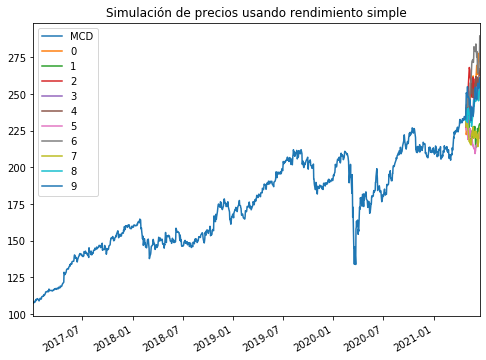

In [17]:
# Simulación del precio
S_0 = closes_mc.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()
S_T.iloc[0,:]=S_0

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_mc, S_T.iloc[:, :10]]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

### RENDIMIENTOS LOGARITMICOS

In [20]:
# Calcular rendimiento logarítmico
ri = calc_daily_ret(closes_mc)

# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# Simulación del rendimiento
Z = np.random.randn(ndays, nscen)
sim_ret_ri = pd.DataFrame(mu_r * dt + Z * sigma_r * np.sqrt(dt), index=dates )

# Simulación del precio
S_0 = closes_mc.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

17.010417783755063

In [21]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.015243748694562288, 0.01523004038358405)

Con los precios simulados debemos de encontrar el valor de la opción según la función de pago correspondiente. Para este caso es:
$$
P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}
$$

## Valuación usando el modelo de Black and Scholes

In [24]:
mu = ret_mc.mean()[0]
sigma = ret_mc.std()[0]
mu, sigma

(0.0007104786606750783, 0.01523004038358405)

In [25]:
# Tasa de bonos de 1 yr de fecha 11/23/20 -> 0.10%
r = 0.0016/360

In [26]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry



#ndays = (expiry - today).days
ndays = len(dates)
nscen = 10
dates = pd.date_range(start=today, periods = ndays)
dates

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01',
               '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05',
               '2021-05-06', '2021-05-07', '2021-05-08', '2021-05-09',
               '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13',
               '2021-05-14', '2021-05-15', '2021-05-16', '2021-05-17',
               '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
               '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
               '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
               '2021-05-30', '2021-05-31', '2021-06-01', '2021-06-02',
               '2021-06-03', '2021-06-04'],
              dtype='datetime64[ns]', freq='D')

In [27]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()

,0,1,2,3,4,5,6,7,8,9
2021-04-28,0.011778,-0.007464,-0.011947,0.025876,-0.002432,0.002714,-0.001413,-0.003938,0.004280,0.012050
2021-04-29,0.010477,-0.011896,-0.006923,0.026915,-0.011475,0.001294,0.020442,-0.014168,0.024928,0.012894
2021-04-30,-0.003119,-0.034087,-0.001416,0.005095,-0.017906,0.009952,0.025240,0.003991,0.020786,0.010585
2021-05-01,-0.004393,-0.060571,0.004127,-0.003656,-0.003733,0.003631,0.017130,0.008723,-0.001779,-0.003527
2021-05-02,0.010242,-0.051031,0.003670,-0.009622,0.009151,0.029497,0.008861,0.002581,-0.008273,-0.007994
2021-05-03,-0.000313,-0.044587,-0.010297,-0.006999,-0.008380,0.031147,0.003797,-0.003485,0.003340,-0.000941
2021-05-04,0.010177,-0.039101,-0.025462,-0.017113,-0.005728,0.032856,-0.007340,-0.008518,-0.001118,0.009770
2021-05-05,0.023353,-0.071069,-0.024616,-0.024387,-0.020599,0.031977,0.001398,0.003933,0.014177,-0.007050
2021-05-06,0.025758,-0.096336,-0.013990,-0.015638,-0.063848,0.036474,0.004320,0.012330,0.033059,-0.024618
2021-05-07,0.024128,-0.108984,-0.009802,-0.002637,-0.080555,0.056516,-0.014942,0.006254,0.026037,-0.040409


In [28]:
S0 = closes_mc.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[-1,0]
sim_closes

,0,1,2,3,4,5,6,7,8,9
2021-04-28,235.709856,231.217645,230.183505,239.056585,232.384103,233.583073,232.621063,232.034401,233.949110,235.774034
2021-04-29,235.403348,230.195268,231.342789,239.305055,230.292098,233.251603,237.761004,229.672845,238.829960,235.973081
2021-04-30,232.224530,225.143308,232.620288,234.139826,228.815952,235.280000,238.904479,233.881493,237.842774,235.428760
2021-05-01,231.928929,219.258816,233.913299,232.099997,232.082001,233.797285,236.974811,234.990997,232.535939,232.129756
2021-05-02,235.348152,221.360527,233.806547,230.719267,235.091582,239.923670,235.023278,233.551912,231.030715,231.095126
2021-05-03,232.877122,222.791696,230.563575,231.325225,231.006032,240.319767,233.836147,232.139509,233.729304,232.730910
2021-05-04,235.332871,224.017110,227.093601,228.997521,231.619469,240.731007,231.246503,230.974043,232.689773,235.236976
2021-05-05,238.454146,216.969153,227.285750,227.337857,228.200534,240.519389,233.276000,233.867954,236.276040,231.313504
2021-05-06,239.028220,211.555676,229.713822,229.335561,218.541483,241.603508,233.958441,235.840080,240.779688,227.285331
2021-05-07,238.639064,208.896661,230.677777,232.336481,214.920634,246.494425,229.495176,234.411327,239.094928,223.724411


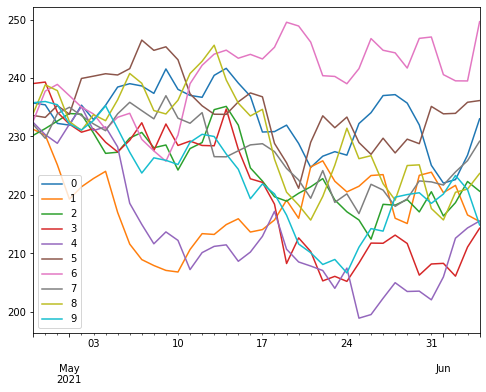

In [29]:
sim_closes.plot(figsize=(8,6));

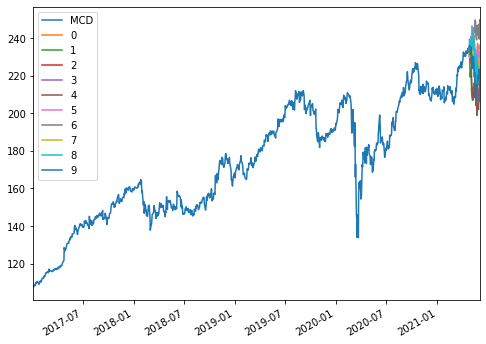

In [30]:
pd.concat([closes_mc,sim_closes]).plot(figsize=(8,6));

In [37]:
opcion_valuar['JSON']

{'contractSymbol': 'MCD210618P00250000',
 'strike': 250.0,
 'currency': 'USD',
 'lastPrice': 18.05,
 'change': -0.69000053,
 'percentChange': -3.6819665,
 'volume': 4,
 'openInterest': 85,
 'bid': 18.9,
 'ask': 19.4,
 'contractSize': 'REGULAR',
 'expiration': 1623974400,
 'lastTradeDate': 1619446398,
 'impliedVolatility': 0.22382367980957027,
 'inTheMoney': True}

In [31]:
from datetime import date
Hoy = date.today()

# strike price
K = opcion_valuar['JSON']['strike']  

# Fechas a simular
dates = pd.date_range(start= Hoy, periods = ndays, freq='B')

# Escenarios y número de días
ndays = len(dates)
nscen = 100000

# Condición inicial del precio a simular
S0 = closes_mc.iloc[-1,0]  

# simular rendimientos
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

### PRIMA

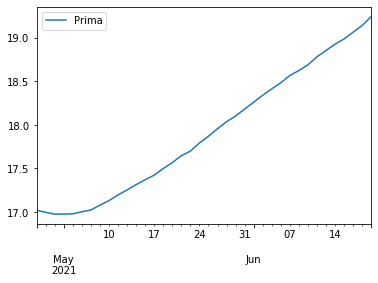

In [35]:
#prima

# Frame con el valor del strike
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)

# Valor del call europeo
put= pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot();

In [36]:
put.iloc[-1]

Prima    19.245448
Name: 2021-06-18 00:00:00, dtype: float64

### Intervalo de confianza del 99%

In [38]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(19.06648625380012, 19.424410708982776)


##  Técnicas de reducción de varianza

### PRIMA

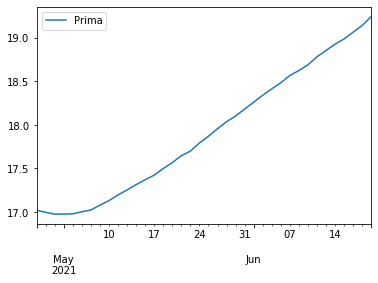

In [39]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [40]:
put.iloc[-1]

Prima    19.245448
Name: 2021-06-18 00:00:00, dtype: float64

### Intervalo de confianza del 99%

In [41]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(19.06648625380012, 19.424410708982776)


## Análisis de la distribución de los rendimientos

### Ajustando norm

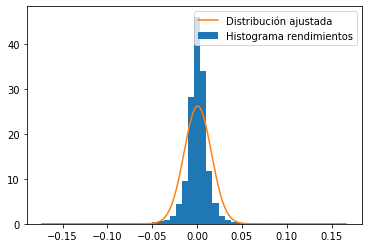

In [42]:
ren = calc_daily_ret(closes_mc) # rendimientos 
y,x,des = plt.hist(ren['MCD'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

### Ajustando t

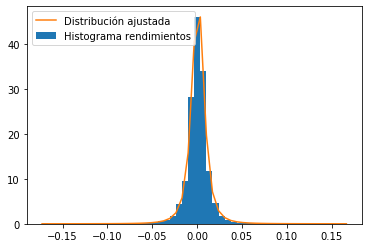

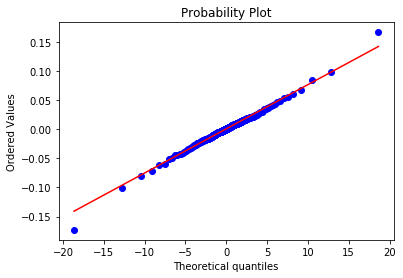

In [43]:
# rendimientos 
ren = calc_daily_ret(closes_mc) 

# Histograma de los rendimientos
y, x, _ = plt.hist(ren['MCD'], bins=50, density=True, label='Histograma rendimientos')

# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 

# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()

# Q-Q
st.probplot(ren['MCD'], sparams=params[:-2], dist=dist, plot=plt);




##  Valuación usando simulación: uso del histograma de rendimientos

In [44]:
ndays = 109 
nscen = 10

In [45]:
prob = y/np.sum(y)
values = x[1:]

In [46]:
#Rendimientos simulados
ret = np.random.choice(values, ndays*nscen, p=prob)

#fechas 
dates = pd.date_range(start=Hoy,periods=ndays)

#REndimientos simulados en matriz

sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist.head()

,0,1,2,3,4,5,6,7,8,9
2021-04-28,0.003642,0.010431,0.003642,0.010431,0.010431,-0.003147,-0.003147,0.010431,-0.016725,0.003642
2021-04-29,0.010431,0.010431,-0.016725,0.003642,0.010431,-0.023514,0.003642,0.010431,0.010431,0.010431
2021-04-30,0.017220,-0.003147,0.003642,0.003642,0.010431,0.003642,0.003642,-0.023514,-0.043880,0.010431
2021-05-01,0.017220,-0.003147,0.024009,0.003642,0.017220,0.030798,0.024009,0.010431,0.010431,0.017220
2021-05-02,-0.050669,0.003642,-0.050669,0.003642,-0.023514,0.003642,0.010431,-0.003147,0.037587,0.010431


In [47]:
sim_closes_hist = (closes_mc.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist.head()

,0,1,2,3,4,5,6,7,8,9
2021-04-28,233.799990,235.392647,233.799990,235.392647,235.392647,232.218108,232.218108,235.392647,229.086382,233.799990
2021-04-29,236.251553,237.860910,229.922277,236.251553,237.860910,226.821512,233.065431,237.860910,231.488519,236.251553
2021-04-30,240.355055,237.113592,230.761222,237.113592,240.355055,227.649143,233.915845,232.333179,221.550330,238.728822
2021-05-01,244.529832,236.368623,236.368623,237.978778,244.529832,234.769362,239.599901,234.769362,223.873446,242.875353
2021-05-02,232.448307,237.231089,224.690320,238.847119,238.847119,235.625993,242.112280,234.031757,232.448307,245.422077


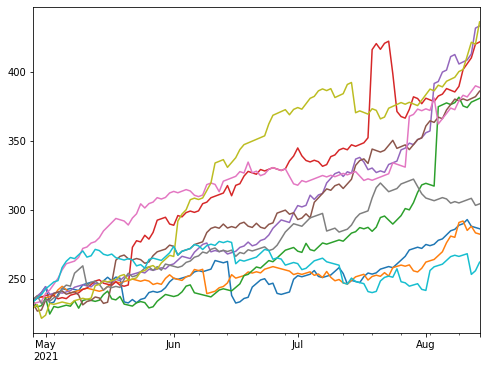

In [48]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

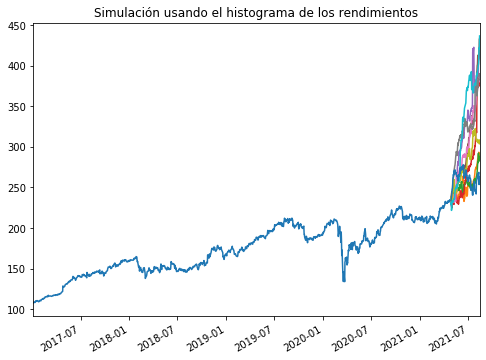

In [49]:
pd.concat([closes_mc,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')


### PRIMA

In [50]:
K = opcion_valuar['JSON']['strike']
ndays = len(dates)
nscen = 10000

# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_mc+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_mc.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

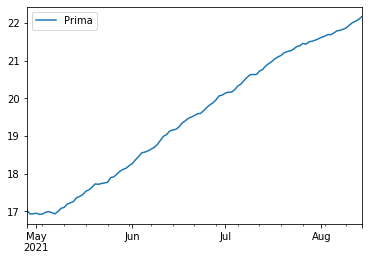

In [51]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [52]:
put_hist.iloc[-1]

Prima    22.166623
Name: 2021-08-14 00:00:00, dtype: float64

### Intervalo de confianza del 95%

In [54]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(21.40370763312131, 22.9295378758849)
(21.40370763312131, 22.9295378758849)


### `Respuesta Juan Pablo`

In [46]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

### `Elección del activo:` _Disney_

Obtengo el precio de cierre de Disney del año pasado hasta la fecha.

In [47]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [48]:
ticker = ['DIS']
start_date = '2018-01-01'

closes_dis = get_adj_closes(ticker,start_date)
closes_dis.head()

Symbols,DIS
Date,
2018-01-02,108.726
2018-01-03,109.193
2018-01-04,109.144
2018-01-05,108.551
2018-01-08,106.995


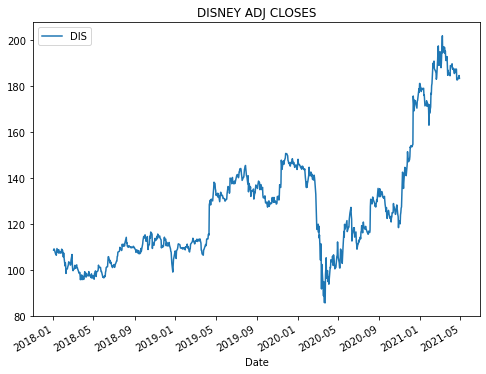

In [49]:
closes_dis.plot(figsize=[8,6])
plt.title('DISNEY ADJ CLOSES')
plt.legend(ticker)
plt.show()

Descarga de los datos de la opción.

In [50]:
dis = web.YahooOptions('DIS')
dis_opt = dis.get_all_data().reset_index()
dis_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-04-30,177.5,call,DIS210430C00177500,...,2021-04-28 20:02:23,2021-04-28 16:10:02,"{'contractSymbol': 'DIS210430C00177500', 'stri..."
2021-04-30,217.5,put,DIS210430P00217500,...,2021-04-28 20:02:23,2021-03-16 16:38:35,"{'contractSymbol': 'DIS210430P00217500', 'stri..."
2021-04-30,220.0,call,DIS210430C00220000,...,2021-04-28 20:02:23,2021-04-28 16:21:04,"{'contractSymbol': 'DIS210430C00220000', 'stri..."
2021-04-30,220.0,put,DIS210430P00220000,...,2021-04-28 20:02:23,2021-03-15 04:01:18,"{'contractSymbol': 'DIS210430P00220000', 'stri..."
2021-04-30,195.0,call,DIS210430C00195000,...,2021-04-28 20:02:23,2021-04-28 19:58:46,"{'contractSymbol': 'DIS210430C00195000', 'stri..."
...,...,...,...,...,...,...,...
2023-01-20,80.0,put,DIS230120P00080000,...,2021-04-28 20:02:23,2021-04-15 14:58:55,"{'contractSymbol': 'DIS230120P00080000', 'stri..."
2023-01-20,130.0,put,DIS230120P00130000,...,2021-04-28 20:02:23,2021-04-28 17:37:09,"{'contractSymbol': 'DIS230120P00130000', 'stri..."
2023-01-20,230.0,put,DIS230120P00230000,...,2021-04-28 20:02:23,2021-04-21 16:41:58,"{'contractSymbol': 'DIS230120P00230000', 'stri..."


In [52]:
K = 130
indice_opt = dis_opt.loc[(dis_opt.Type=='put') & (dis_opt.Strike==K) & (dis_opt.Expiry=='2023-01-20')]
indice_opt


,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
224,130.0,2023-01-20,put,...,2021-04-28 20:02:23,2021-04-28 17:37:09,"{'contractSymbol': 'DIS230120P00130000', 'stri..."


In [53]:
i_opt = indice_opt.index
opcion_valuar = dis_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'DIS230120P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 6.7,
 'change': 0.19999981,
 'percentChange': 3.07692,
 'volume': 1,
 'openInterest': 5528,
 'bid': 5.9,
 'ask': 6.8,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619631429,
 'impliedVolatility': 0.3076851458740234,
 'inTheMoney': False}

In [8]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  184.257


### `Simulación usando Rendimiento Simple`

>Suponemos que los rendimientos $r\sim N(\mu,\sigma_{2})$ 

In [54]:
ret = closes_dis.pct_change().iloc[1:]
ret

Symbols,DIS
Date,
2018-01-03,4.293e-03
2018-01-04,-4.452e-04
2018-01-05,-5.435e-03
2018-01-08,-1.433e-02
2018-01-09,-7.272e-04
...,...
2021-04-22,-1.911e-03
2021-04-23,1.423e-03
2021-04-26,6.830e-03


### `Visualización de los rendimientos logaritmicos`

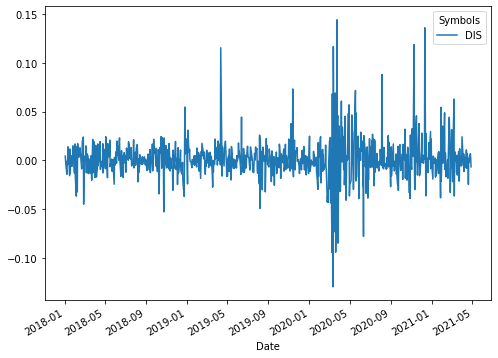

In [55]:
ret.plot(figsize=[8,6]);

>Obtengo la media y su desviación estándar.

In [56]:
mu = ret.mean()[0]
sigma = ret.std()[0]

mu,sigma

(0.0008394612471699439, 0.020768673274046856)

>Obtengo un rango de fechas

In [57]:
from datetime import date

today = pd.to_datetime(date.today())
expiry = opcion_valuar.Expiry

ndays = (expiry-today).days
nscen = 1000
dates = pd.date_range(start=today, periods = ndays)
ndays 

632

In [58]:
expiry

Timestamp('2023-01-20 00:00:00')

In [59]:
dates

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01',
               '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05',
               '2021-05-06', '2021-05-07',
               ...
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19'],
              dtype='datetime64[ns]', length=632, freq='D')

### `Simulación utilizando rendimiento simple`

In [60]:
# Para que sea diario 
dt = 1

Z = np.random.randn(ndays,nscen)

#Simulación de los rendimientos
ret_dt = pd.DataFrame(Z*sigma*np.sqrt(dt)+mu*dt,index=dates)
ret_dt

,0,1,2,...,997,998,999
2021-04-28,0.015,0.018,0.015,...,-6.828e-03,-0.009,1.015e-02
2021-04-29,0.013,0.006,-0.029,...,-1.406e-02,0.022,4.127e-02
2021-04-30,0.028,-0.010,-0.011,...,6.567e-02,-0.014,3.474e-03
2021-05-01,0.005,-0.008,0.013,...,1.697e-02,-0.026,-2.013e-02
2021-05-02,-0.013,0.005,-0.002,...,2.540e-02,0.007,-3.258e-02
...,...,...,...,...,...,...,...
2023-01-15,-0.014,-0.019,-0.018,...,1.246e-02,0.004,-1.470e-02
2023-01-16,0.041,0.032,0.003,...,-1.150e-02,-0.004,-2.507e-03
2023-01-17,0.015,0.016,-0.003,...,-1.187e-02,0.012,2.276e-04
2023-01-18,0.016,0.007,0.021,...,2.695e-02,0.013,-3.980e-02


In [61]:
S0 = opcion_valuar.Underlying_Price
np.cumprod(ret_dt+1)

,0,1,2,...,997,998,999
2021-04-28,1.015,1.018,1.015,...,0.993,0.991,1.010
2021-04-29,1.028,1.023,0.985,...,0.979,1.013,1.052
2021-04-30,1.057,1.013,0.974,...,1.044,0.998,1.055
2021-05-01,1.063,1.005,0.987,...,1.061,0.972,1.034
2021-05-02,1.049,1.010,0.986,...,1.088,0.979,1.001
...,...,...,...,...,...,...,...
2023-01-15,0.469,3.142,2.585,...,0.935,1.301,1.912
2023-01-16,0.488,3.243,2.593,...,0.924,1.295,1.907
2023-01-17,0.495,3.295,2.584,...,0.913,1.311,1.907
2023-01-18,0.503,3.319,2.637,...,0.938,1.327,1.831


In [62]:
# Simulando el precio
S_0 = closes_dis.iloc[-1,0]
S_T = S_0*(1+ret_dt).cumprod()

Vizualisación de los precios simulados junto con los precios descargados

Text(0.5, 1.0, 'Simulación de precios usando rendimiento simple')

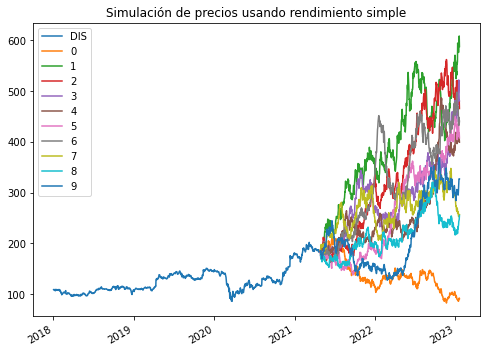

In [63]:
pd.concat([closes_dis,S_T.iloc[:,:10]]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple')

### `Simulación usando Rendimiento Logaritmico`

In [64]:
# función que obtiene los redimientos logaritmicos
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

In [65]:
r_log = calc_daily_ret(closes_dis)
r_log

Symbols,DIS
Date,
2018-01-03,4.284e-03
2018-01-04,-4.453e-04
2018-01-05,-5.450e-03
2018-01-08,-1.444e-02
2018-01-09,-7.274e-04
...,...
2021-04-22,-1.913e-03
2021-04-23,1.422e-03
2021-04-26,6.807e-03


### `Visualización de los rendimientos logaritmicos`

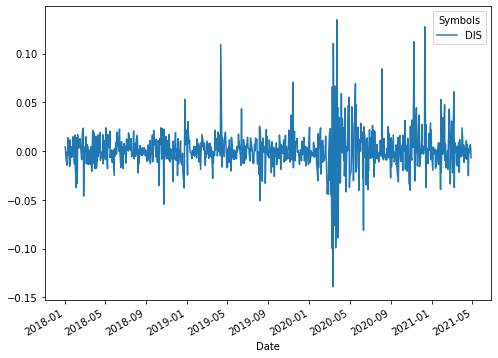

In [66]:
r_log.plot(figsize=[8,6]);

>Media y desviación estándar de los rendimientos logaritmicos

In [67]:
mu_r = r_log.mean()[0]
sigma_r = r_log.std()[0]

mu_r, sigma_r

(0.0006260879772115214, 0.020613204082094775)

In [68]:
# simulación del rendimiento
Z = np.random.randn(ndays,nscen)
sim_ret_log = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt),index=dates)
sim_ret_log

,0,1,2,...,997,998,999
2021-04-28,-0.006,0.020,0.063,...,0.045,-0.001,0.003
2021-04-29,0.004,0.010,-0.008,...,0.047,0.026,-0.030
2021-04-30,0.004,-0.015,-0.010,...,0.003,-0.006,-0.013
2021-05-01,0.014,0.020,0.028,...,-0.038,0.022,-0.010
2021-05-02,0.019,-0.004,-0.021,...,-0.017,-0.002,0.012
...,...,...,...,...,...,...,...
2023-01-15,0.011,0.025,-0.035,...,0.011,0.005,0.021
2023-01-16,0.012,-0.003,-0.007,...,-0.008,0.028,0.020
2023-01-17,0.001,0.043,-0.021,...,0.018,0.008,0.002
2023-01-18,-0.023,-0.010,-0.018,...,-0.004,-0.011,0.044


In [69]:
# simulación del precio
S_0 = closes_dis.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_log.cumsum())
S_T2.iloc[0,:]=S_0
S_T2

,0,1,2,...,997,998,999
2021-04-28,183.390,183.390,183.390,...,183.390,183.390,183.390
2021-04-29,182.919,189.001,193.684,...,201.182,187.851,178.428
2021-04-30,183.627,186.108,191.777,...,201.853,186.777,176.152
2021-05-01,186.292,189.920,197.288,...,194.348,191.013,174.438
2021-05-02,189.950,189.122,193.179,...,190.993,190.636,176.488
...,...,...,...,...,...,...,...
2023-01-15,196.859,257.813,249.276,...,145.164,294.548,122.066
2023-01-16,199.225,256.995,247.522,...,144.049,303.051,124.562
2023-01-17,199.432,268.416,242.407,...,146.733,305.458,124.752
2023-01-18,194.924,265.798,238.061,...,146.206,302.021,130.316


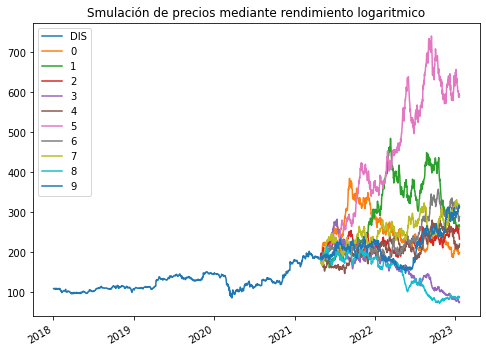

In [71]:
# precios simulados con los precios descargados
pd.concat([closes_dis,S_T2.iloc[:,:10]]).plot(figsize=[8,6])
plt.title('Smulación de precios mediante rendimiento logaritmico')
plt.show()

Encontar el valor de la opción según su función de pago en este caso para una put es la siguiente:

$$ max(K-S_T,0)$$

### `Valuación usando el modelo de Black & Scholes`

Supuestos del modelo:

1. El comportamiento del precio de la acción corresponde al modelo logarítmico normal, con $\mu$ y $\sigma$
constantes.
2. No hay costos de transición ni impuestos. Todos los títulos son perfectamente divisibles.
3. No hay dividendos sobre la acción durante la vida de la opción.
4. No hay oportunidades de arbitraje libres de riesgo.
5. La negociación de valores es continua.
6. Los inversionistas pueden adquirir u otorgar préstamos a la misma tasa de interés libre de riesgo.
7. La tasa de interés libre de riesgo a corto plazo, r, es constante.


Ya que estamos en un mundo neutral al riesgo ( a un año) tomamos la tasa libre de riesgo y no la media.

La tomo de:  https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield

In [116]:
r = (0.06/100)/360

Simulo el tiempo de contato desde HOY hasta la fecha de Expiración con 10 escenarios.

In [117]:
nscen = 10
sim_ret = pd.DataFrame(sigma_r*np.random.randn(ndays,nscen)+r,index=dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-04-28,-4.516e-03,3.286e-02,0.025,...,-0.028,-0.010,0.025
2021-04-29,-2.553e-02,6.382e-02,-0.010,...,-0.033,-0.020,0.010
2021-04-30,-8.939e-03,3.390e-02,0.020,...,-0.044,-0.039,0.001
2021-05-01,-8.849e-04,9.991e-03,0.044,...,-0.075,-0.040,-0.017
2021-05-02,2.096e-02,-8.725e-03,0.038,...,-0.077,-0.026,0.016
...,...,...,...,...,...,...,...
2023-01-15,7.813e-02,3.989e-02,0.580,...,-0.452,0.270,-0.310
2023-01-16,1.026e-01,1.605e-02,0.599,...,-0.469,0.297,-0.327
2023-01-17,8.671e-02,8.584e-04,0.565,...,-0.457,0.277,-0.297
2023-01-18,1.232e-01,7.751e-03,0.547,...,-0.496,0.278,-0.321


Despúes de simular los rendimientos, calculo los escenarios de precios.

In [118]:
S0 = closes_dis.iloc[-1,0]
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[0,:]
sim_closes

,0,1,2,...,7,8,9
2021-04-28,182.564,189.516,188.063,...,178.241,181.622,188.038
2021-04-29,178.768,195.476,181.516,...,177.367,179.688,185.141
2021-04-30,181.758,189.713,187.059,...,175.554,176.319,183.618
2021-05-01,183.228,185.231,191.637,...,170.142,176.283,180.320
2021-05-02,187.274,181.797,190.540,...,169.731,178.631,186.422
...,...,...,...,...,...,...,...
2023-01-15,198.293,190.853,327.625,...,116.645,240.231,134.488
2023-01-16,203.197,186.358,333.960,...,114.731,246.704,132.188
2023-01-17,200.001,183.547,322.565,...,116.127,242.039,136.254
2023-01-18,207.428,184.817,316.894,...,111.714,242.155,133.088


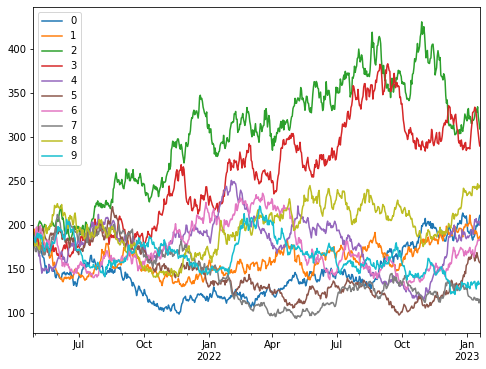

In [119]:
sim_closes.plot(figsize=(8,6));

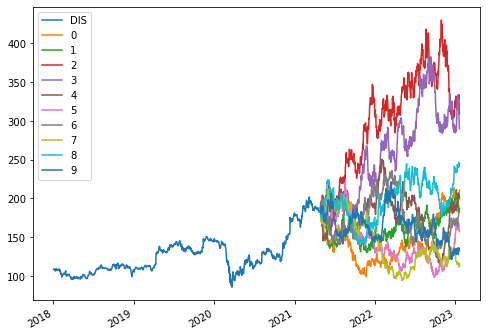

In [120]:
# precios simulados 

pd.concat([closes_dis,sim_closes]).plot(figsize=(8,6));

Obtengo la volatilidad implicita de los datos de la opción

In [121]:
opcion_valuar['JSON']

{'contractSymbol': 'DIS230120P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 6.7,
 'change': 0.19999981,
 'percentChange': 3.07692,
 'volume': 1,
 'openInterest': 5528,
 'bid': 5.9,
 'ask': 6.8,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619631429,
 'impliedVolatility': 0.3076851458740234,
 'inTheMoney': False}

In [122]:
sigma = 0.3076851458740234/np.sqrt(252)
sigma

0.019382342335507077

In [123]:
S0 = closes_dis.iloc[-1,0]

K = opcion_valuar['JSON']['strike']

ndays = len(dates)
nscen = 100000

# simulo rendimientos
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# simulo precios
sim_closes = S0*np.exp(sim_ret.cumsum())

In [124]:
sim_closes.head()

,0,1,2,...,99997,99998,99999
2021-04-28,185.993,183.144,181.710,...,186.000,183.208,188.268
2021-04-29,186.427,182.566,177.305,...,180.279,185.159,184.090
2021-04-30,190.619,184.544,175.817,...,182.034,181.184,183.939
2021-05-01,184.250,177.637,171.732,...,188.444,182.841,180.455
2021-05-02,188.073,175.696,171.647,...,189.442,182.051,180.575


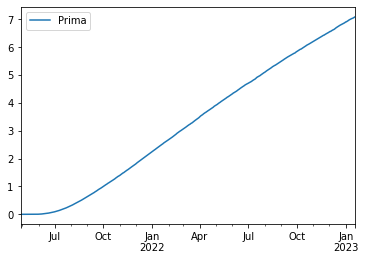

In [125]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)

# valor del pull europeo de disney
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                    *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).mean(axis=1)},index=dates)

put.plot();

La valuación de la opcíón es:

In [126]:
put.iloc[-1]

Prima    7.096
Name: 2023-01-19 00:00:00, dtype: float64

### `Simulación de precios usando técnicas de reducción de varianza`

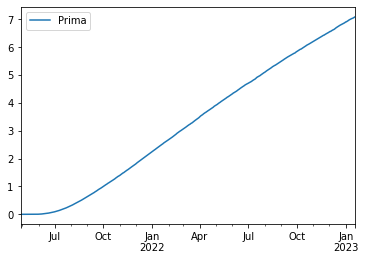

In [133]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [134]:
put.iloc[-1]

Prima    7.096
Name: 2023-01-19 00:00:00, dtype: float64

**Intervalo de confianza del 99%**

In [128]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza,loc=mean_est, scale = sigma_est)
print(i2)

(6.216055289930898, 7.976462294542062)


**Análisis de la distribución de rendimientos**

**Ajustando una distribución normal**

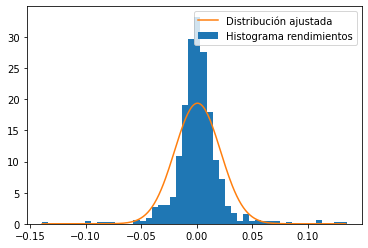

In [129]:
ren = calc_daily_ret(closes_dis) # rendimientos 
y,x,des = plt.hist(ren['DIS'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

**Ajustando una distribución t**

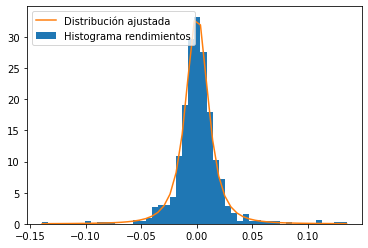

In [130]:
# rendimientos 
ren = calc_daily_ret(closes_dis) 

# Histograma de los rendimientos
y, x, _ = plt.hist(ren['DIS'], bins=50, density=True, label='Histograma rendimientos')

# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 

# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()



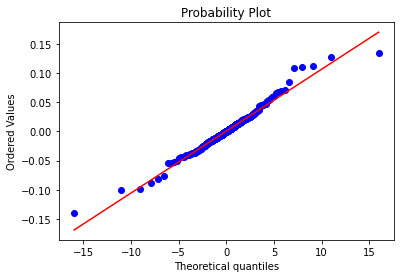

In [132]:
# Q-Q
st.probplot(ren['DIS'], sparams=params[:-2], dist=dist, plot=plt);

### `Valuación usando simulación: uso del histograma de rendimientos`

In [138]:
nscen = 10

In [139]:
ndays,nscen

(632, 10)

In [140]:
prob = y/np.sum(y)
values = x[1:]
prob.sum()

0.9999999999999998

In [142]:
#rendimientos simulados
ret = np.random.choice(values, ndays*nscen, p=prob)
#fechas
dates = pd.date_range(start=today,periods=ndays)
#rendimiento simulado en dataframe
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2021-04-28,-0.008,0.009,-0.008,...,0.003,-0.002,0.003
2021-04-29,-0.002,0.003,-0.013,...,0.009,0.003,-0.002
2021-04-30,-0.035,-0.002,0.003,...,-0.030,0.014,0.014
2021-05-01,0.009,0.003,-0.002,...,0.014,-0.002,-0.024
2021-05-02,0.009,0.003,-0.002,...,-0.002,-0.008,-0.002
...,...,...,...,...,...,...,...
2023-01-15,0.014,-0.002,0.009,...,-0.002,0.003,0.003
2023-01-16,-0.079,-0.002,-0.002,...,0.009,0.009,-0.008
2023-01-17,-0.041,0.031,0.020,...,0.009,0.003,-0.002
2023-01-18,0.003,0.014,0.025,...,-0.030,0.025,-0.002


In [144]:
sim_closes_hist = (closes_dis.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2021-04-28,181.984,184.997,181.984,...,183.987,182.983,183.987
2021-04-29,181.580,185.600,179.602,...,185.600,183.579,183.579
2021-04-30,175.322,185.188,180.187,...,180.187,186.204,186.204
2021-05-01,176.859,185.791,179.787,...,182.764,185.791,181.767
2021-05-02,178.409,186.396,179.388,...,182.358,184.366,181.363
...,...,...,...,...,...,...,...
2023-01-15,1023.035,3091.373,2801.276,...,916.938,1984.137,916.938
2023-01-16,945.453,3084.509,2795.056,...,924.974,2001.526,909.907
2023-01-17,907.887,3180.429,2850.593,...,933.081,2008.045,907.887
2023-01-18,910.844,3225.915,2923.192,...,905.871,2059.186,905.871


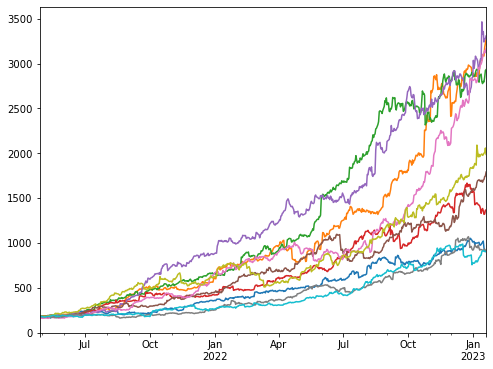

In [145]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

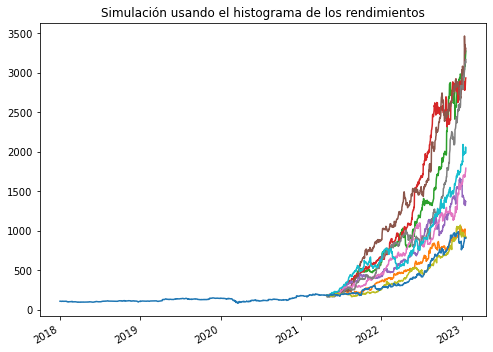

In [146]:
pd.concat([closes_dis,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [155]:
K = opcion_valuar['JSON']['strike']
ndays = len(dates)
nscen = 10000

# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(r_log+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_dis.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

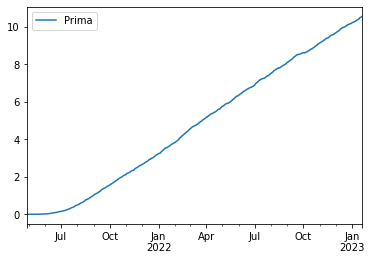

In [156]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();


In [157]:
put_hist.iloc[-1]

Prima    10.543
Name: 2023-01-19 00:00:00, dtype: float64

In [158]:
opcion_valuar['JSON']

{'contractSymbol': 'DIS230120P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 6.7,
 'change': 0.19999981,
 'percentChange': 3.07692,
 'volume': 1,
 'openInterest': 5528,
 'bid': 5.9,
 'ask': 6.8,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619631429,
 'impliedVolatility': 0.3076851458740234,
 'inTheMoney': False}

In [154]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(-9.194622466914833, 9.237702698791118)
(-9.194622466914833, 9.237702698791118)
